In [1]:
import numpy as np
from matplotlib import pyplot as plt
from utils import * 


Bad key "text.kerning_factor" on line 4 in
/Users/yutingli/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
L=2049  # system size 2**n+1
N=5000 # number of realisations

p=0.34 # prob. of hopping in the same direction as the previous hop 
q=0.33

hs = np.arange(0.260, 0.310, 0.001) 
n = int(np.floor(np.log2(L)) - 1)

edge_reach_frac = [] 
all_edge_reach_frac = [] 
ts = [] 
mean_msds = [] 
actives = [] 
passives = [] 

for h in hs:
    filename = 'pack/data_L{}_N{}_p{}_q{}_h{:.3f}.dat'.format(L, N, p, q, h)
    print(filename)
    file = open(filename)
    realisations, moments = read_file(file, verbose=False) 
    
    times = [] 
    msds = [] 
    tot_edge_reach = 0 
    tot_possible_edge = len(realisations)*4 
    all_edge_reach = 0 

    for (i, realisation) in enumerate(realisations):

        time, msd, edge_reach, coarse_grain_moments = extract_lite(realisation, n)
        times.append(time)
        msds.append(msd)
        tot_edge_reach += np.sum(edge_reach>0)
        all_edge_reach += int(np.sum(edge_reach>0) == 4)
        
    edge_reach_frac.append(tot_edge_reach/tot_possible_edge)
    all_edge_reach_frac.append(all_edge_reach/len(realisations))
    t = select_longest(times)
    mean_msd = np.mean(pad(msds), axis=0)
    
    ts.append(t) 
    mean_msds.append(mean_msd)
    
    active_moments, tracer_moments = extract_moments(moments)
    
    actives.append(active_moments)
    passives.append(tracer_moments)

pack/data_L2049_N5000_p0.34_q0.33_h0.260.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.261.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.262.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.263.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.264.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.265.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.266.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.267.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.268.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.269.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.270.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.271.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.272.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.273.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.274.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.275.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.276.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.277.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.278.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.279.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.280.dat
pack/data_L2049_N5000_p0.34_q0.33_h0.281.dat
pack/data_

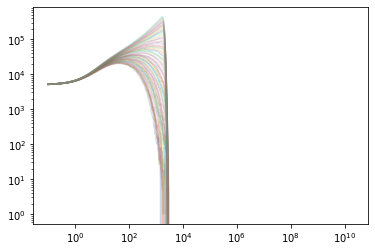

In [35]:
for (i, active_moments) in enumerate(actives): 
    t = active_moments[:, 0]
    m = active_moments[:, 2]

    plt.plot(t, m, alpha=0.2)
plt.yscale('log')
plt.xscale('log')
plt.show() 

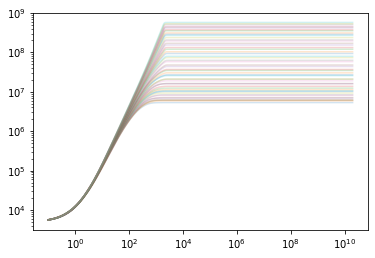

In [13]:
for (i, tracer_moments) in enumerate(passives): 
    t = tracer_moments[:, 0]
    m = tracer_moments[:, 2]

    plt.plot(t, m, alpha=0.2)
plt.yscale('log')
plt.xscale('log')
plt.show() 

/Users/yutingli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


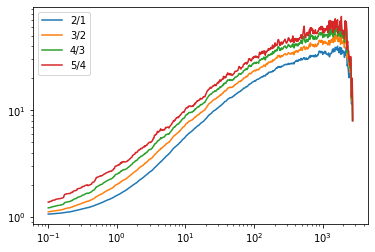

In [36]:
active_moments = actives[20]
t = active_moments[:, 0]
for i in range(3, 7): 
    m = active_moments[:, i]/active_moments[:, i-1]
    plt.plot(t, m, label='{}/{}'.format(i-1, i-2))
plt.legend() 
plt.yscale('log')
plt.xscale('log')
plt.show() 

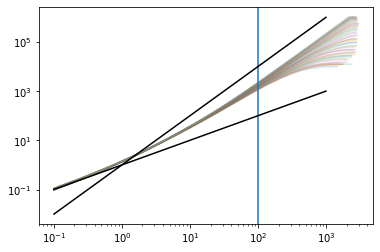

In [6]:
for (t, m) in zip(ts, mean_msds): 
    if len(t[:-1]) == len(m):
        plt.plot(t[:-1], m, alpha=0.2)
plt.axvline(x=1e2)

x = np.array(t)
x = x[x<1e3] 
plt.plot(x, x**2, color='k')
plt.plot(x, x, color='k')
plt.xscale('log')
plt.yscale('log')
plt.show() 

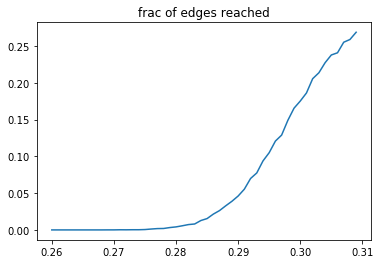

In [7]:
plt.plot(hs, edge_reach_frac)
plt.title('frac of edges reached')
plt.show() 

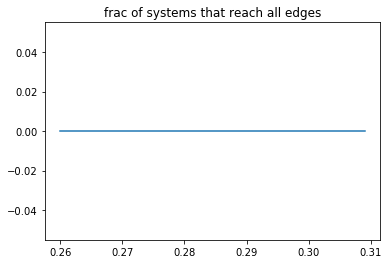

In [8]:
plt.plot(hs, all_edge_reach_frac)
plt.title('frac of systems that reach all edges')
plt.show() 

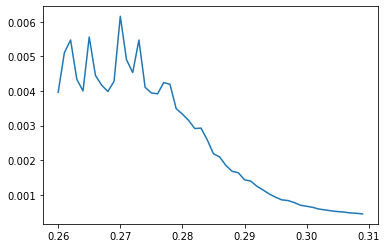

In [12]:
binder = []  
for (i,h) in enumerate(hs):
    m4 = passives[i][-1, 5] # moment at t infinity
    m2 = passives[i][-1, 3]
    binder.append(m4/(m2**2))
    
plt.plot(hs,binder)
plt.show() 

data/data_L257_N5000_p0.34_q0.33_h0.260.dat
data/data_L257_N5000_p0.34_q0.33_h0.261.dat
data/data_L257_N5000_p0.34_q0.33_h0.262.dat
data/data_L257_N5000_p0.34_q0.33_h0.263.dat
data/data_L257_N5000_p0.34_q0.33_h0.264.dat
data/data_L257_N5000_p0.34_q0.33_h0.265.dat
data/data_L257_N5000_p0.34_q0.33_h0.266.dat
data/data_L257_N5000_p0.34_q0.33_h0.267.dat
data/data_L257_N5000_p0.34_q0.33_h0.268.dat
data/data_L257_N5000_p0.34_q0.33_h0.269.dat
data/data_L257_N5000_p0.34_q0.33_h0.270.dat
data/data_L257_N5000_p0.34_q0.33_h0.271.dat
data/data_L257_N5000_p0.34_q0.33_h0.272.dat
data/data_L257_N5000_p0.34_q0.33_h0.273.dat
data/data_L257_N5000_p0.34_q0.33_h0.274.dat
data/data_L257_N5000_p0.34_q0.33_h0.275.dat
data/data_L257_N5000_p0.34_q0.33_h0.276.dat
data/data_L257_N5000_p0.34_q0.33_h0.277.dat
data/data_L257_N5000_p0.34_q0.33_h0.278.dat
data/data_L257_N5000_p0.34_q0.33_h0.279.dat
data/data_L257_N5000_p0.34_q0.33_h0.280.dat
data/data_L257_N5000_p0.34_q0.33_h0.281.dat
data/data_L257_N5000_p0.34_q0.33

data/data_L2049_N5000_p0.34_q0.33_h0.295.dat
data/data_L2049_N5000_p0.34_q0.33_h0.296.dat
data/data_L2049_N5000_p0.34_q0.33_h0.297.dat
data/data_L2049_N5000_p0.34_q0.33_h0.298.dat
data/data_L2049_N5000_p0.34_q0.33_h0.299.dat
data/data_L2049_N5000_p0.34_q0.33_h0.300.dat
data/data_L2049_N5000_p0.34_q0.33_h0.301.dat
data/data_L2049_N5000_p0.34_q0.33_h0.302.dat
data/data_L2049_N5000_p0.34_q0.33_h0.303.dat
data/data_L2049_N5000_p0.34_q0.33_h0.304.dat
data/data_L2049_N5000_p0.34_q0.33_h0.305.dat
data/data_L2049_N5000_p0.34_q0.33_h0.306.dat
data/data_L2049_N5000_p0.34_q0.33_h0.307.dat
data/data_L2049_N5000_p0.34_q0.33_h0.308.dat
data/data_L2049_N5000_p0.34_q0.33_h0.309.dat


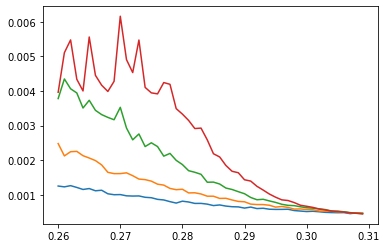

In [5]:
L=2049  # system size 2**n+1
Ls = [257, 513, 1025, 2049]
N=5000 # number of realisations

p=0.34 # prob. of hopping in the same direction as the previous hop 
q=0.33

hs = np.arange(0.260, 0.310, 0.001) 
n = int(np.floor(np.log2(L)) - 1)

for L in Ls: 
    binder = [] 
    for h in hs:
        filename = 'data/data_L{}_N{}_p{}_q{}_h{:.3f}.dat'.format(L, N, p, q, h)
        print(filename)
        file = open(filename)
        realisations, moments = read_file(file, verbose=False) 
        
        active_moments, tracer_moments = extract_moments(moments)
    
        m4 = tracer_moments[-1, 5] # moment at t infinity
        m2 = tracer_moments[-1, 3]
        binder.append(m4/(m2**2))
    
    plt.plot(hs, binder) 
plt.show() 
        
        